# CV: Timeline Visualization from Gantt Chart

In [1]:
import numpy as np
import pandas as pd
import warnings
from plotnine import *
from datetime import datetime, time
import math

In [2]:
pd.set_option('display.max_rows', 20)
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

In [3]:
now = datetime.now()
today = now.strftime('%Y-%m-%d')
today

'2020-02-07'

In [4]:
df = pd.read_excel('data/experience.xlsx')

In [5]:
df['End'] = df['End'].fillna(today)

In [6]:
df

,Role,Place,Type,Start,End
0,BSc in Information Enginerring,King Mongkut's Institute of Technology Ladkrabang,Academic,2014-08-01,2018-05-31 00:00:00
1,Data Scientist,Central Technology Organization,Work Experience,2018-06-01,2020-02-07
2,Techjam 2019 Final Round Competitor,Kasikorn Business-Technology Group,Extra,2019-11-30,2020-02-07
3,Home Hackathon 2019 Competitor,Chula-HOME dot TECH,Extra,2019-08-24,2020-02-07


In [7]:
colour = ['red', 'blue', 'green']
colour

['red', 'blue', 'green']

In [8]:
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

In [9]:
df

,Role,Place,Type,Start,End
0,BSc in Information Enginerring,King Mongkut's Institute of Technology Ladkrabang,Academic,2014-08-01,2018-05-31
1,Data Scientist,Central Technology Organization,Work Experience,2018-06-01,2020-02-07
2,Techjam 2019 Final Round Competitor,Kasikorn Business-Technology Group,Extra,2019-11-30,2020-02-07
3,Home Hackathon 2019 Competitor,Chula-HOME dot TECH,Extra,2019-08-24,2020-02-07


In [10]:
cvlong = pd.DataFrame()
cvlong['pos'] = np.repeat(np.arange(df.shape[0]) + 1, 2)
cvlong['name'] = np.repeat(df['Role'].values, 2)
cvlong['type'] = np.repeat(pd.Categorical(df['Type'].values, ordered=True), 2)
cvlong['where'] = np.repeat(df['Place'].values, 2)
index = np.repeat(np.arange(df.shape[0]), 2)
cvlong['value'] = [df.iloc[index[i]]['Start'] if i % 2 == 0 else df.iloc[index[i]]['End'] for i in cvlong.index]
date = (df['Start'] + ((df['End'] - df['Start']) / 2)).dt.date
cvlong['label_pos'] = np.repeat(date.values, 2)
cvlong

,pos,name,type,where,value,label_pos
0,1,BSc in Information Enginerring,Academic,King Mongkut's Institute of Technology Ladkrabang,2014-08-01,2016-06-30
1,1,BSc in Information Enginerring,Academic,King Mongkut's Institute of Technology Ladkrabang,2018-05-31,2016-06-30
2,2,Data Scientist,Work Experience,Central Technology Organization,2018-06-01,2019-04-05
3,2,Data Scientist,Work Experience,Central Technology Organization,2020-02-07,2019-04-05
4,3,Techjam 2019 Final Round Competitor,Extra,Kasikorn Business-Technology Group,2019-11-30,2020-01-03
5,3,Techjam 2019 Final Round Competitor,Extra,Kasikorn Business-Technology Group,2020-02-07,2020-01-03
6,4,Home Hackathon 2019 Competitor,Extra,Chula-HOME dot TECH,2019-08-24,2019-11-15
7,4,Home Hackathon 2019 Competitor,Extra,Chula-HOME dot TECH,2020-02-07,2019-11-15


In [11]:
maxdate = df['End'].max()
maxdate

Timestamp('2020-02-07 00:00:00')

In [12]:
name_order = cvlong.sort_values(['pos'], ascending=False)['name'].unique()
cvlong['name'] = pd.Categorical(cvlong['name'], categories=name_order, ordered=True)

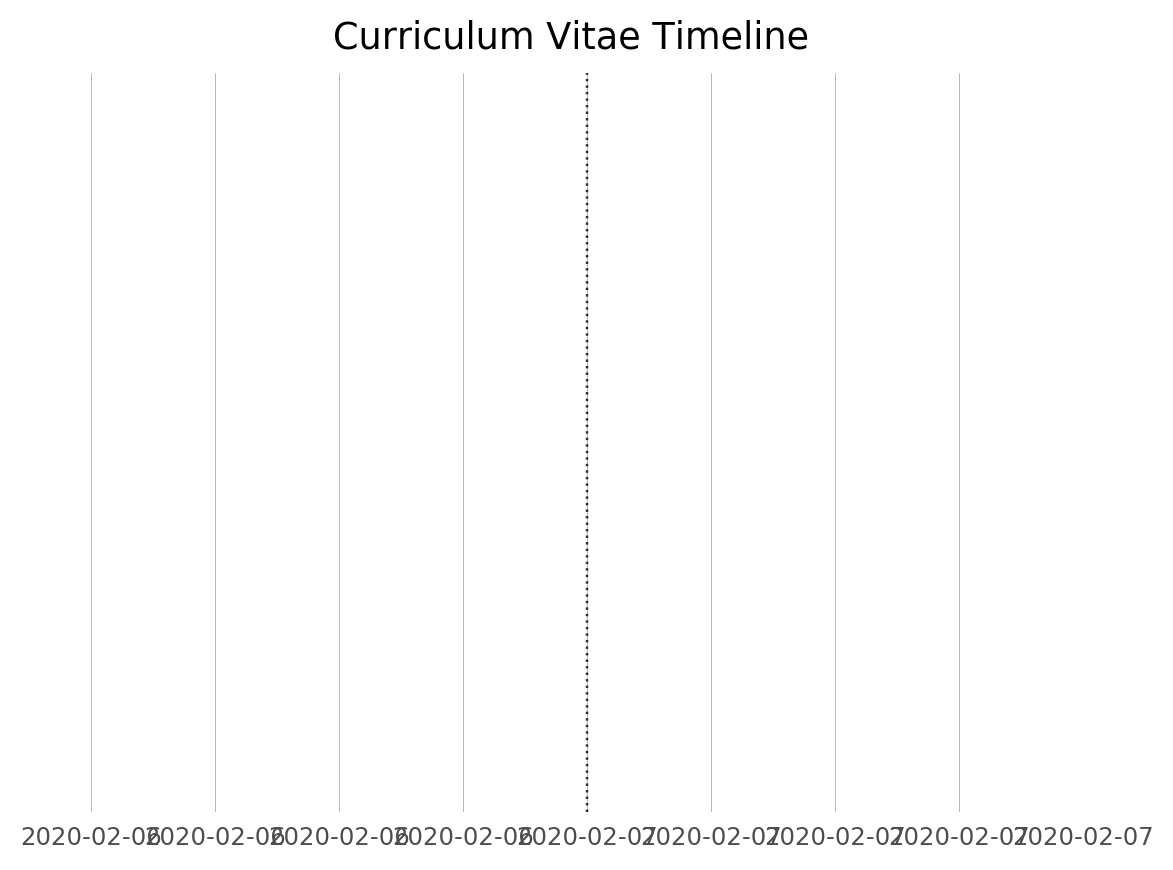

<ggplot: (311021632)>

In [13]:
g = (ggplot(cvlong, aes(x='value', y='name', label='where', group='pos')) +
    geom_vline(xintercept=maxdate, alpha=0.8, linetype='dotted') +
    labs(title="Curriculum Vitae Timeline", subtitle="Chonlapat Patanajirasit", x=None, y=None, colour=None) +
    theme(panel_background=element_rect(fill='white', colour=None), 
          axis_ticks=element_blank(),
          panel_grid_major_x=element_line(size=0.25, colour='#999999')))
g

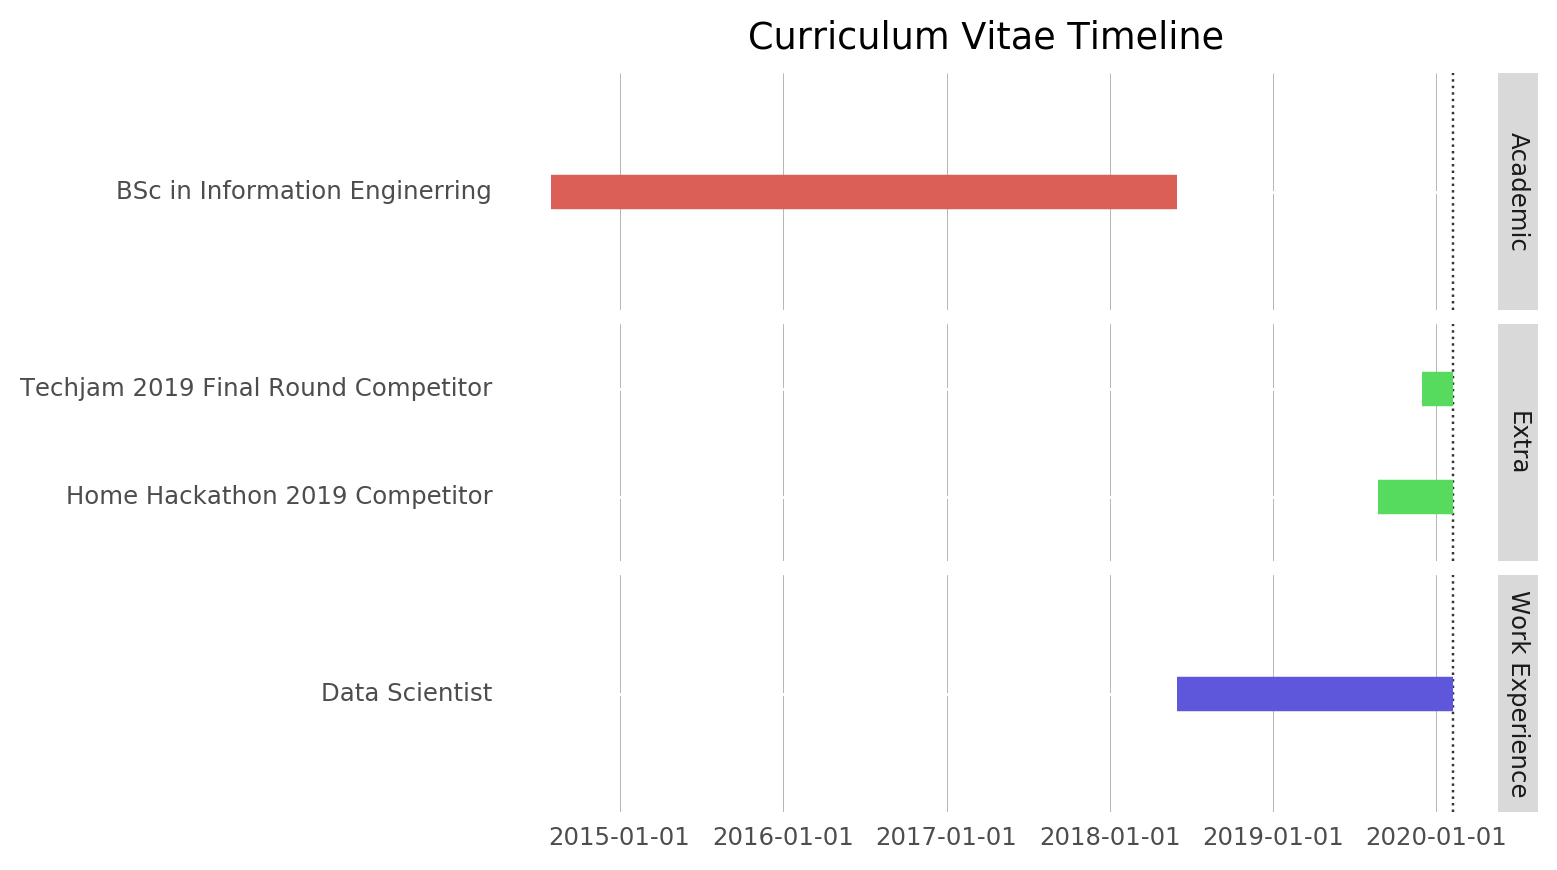

<ggplot: (313205936)>

In [14]:
if (~cvlong['type'].isna()[0] | cvlong['type'].nunique() > 1):
    g = (g + geom_line(aes(color='type'), size=7) +
        facet_grid('type~.', scales='free', space='free') +
        guides(colour=False) +
        scale_colour_hue())
else:
    g = (g + geom_line(size=7, colour='orange'))

g

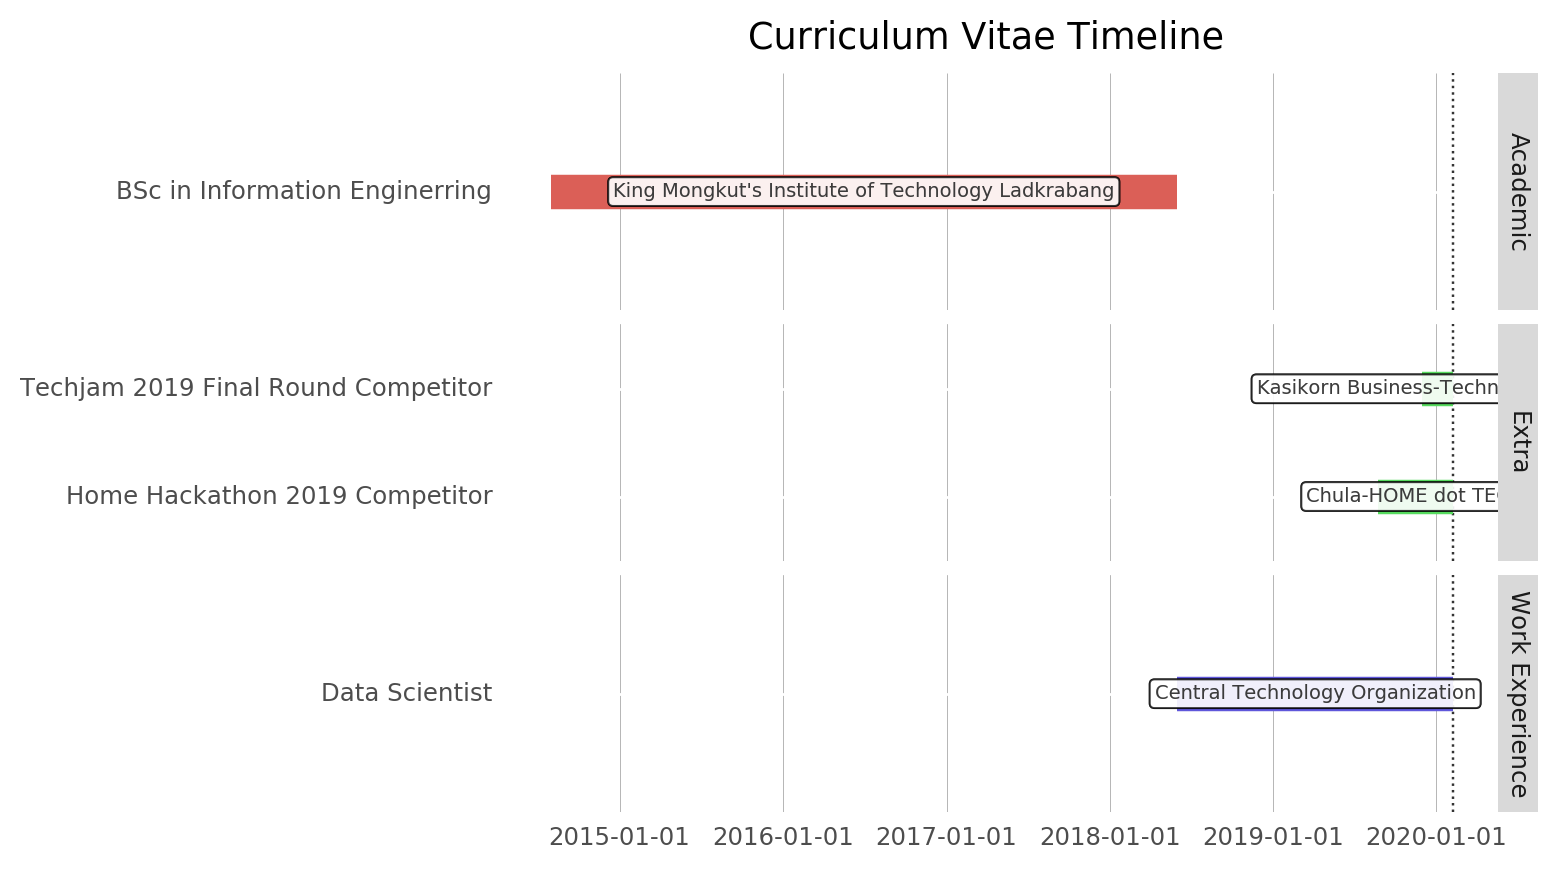

<ggplot: (-9223372036543774243)>

In [15]:
g = (g + geom_label(aes(x='label_pos'), colour='black', size=7, alpha=0.7))
g